In [1]:
import pandas as pd
import os
import numpy as np
import datetime as dt     
import re
import seaborn as sns
import matplotlib.pyplot as plt

pwd = os.getcwd()
city = 'boston'
listings = pd.read_csv(pwd + '/' + city +'/listings_2015.csv')

In [2]:
listings.columns

Index(['id', 'host_since_days', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'AirConditioning', 'BuzzerWirelessIntercom',
       'C

In [3]:
col_price = ['neighbourhood', 'property_type', 'room_type',
             'accommodates', 'bathrooms', 'bedrooms', 'bed_type','guests_included', 'beds',
             'minimum_nights', 'maximum_nights', 'availability_90','availability_365',
              'review_scores_rating',
#              'review_scores_accuracy', 'review_scores_cleanliness',
#              'review_scores_checkin', 'review_scores_communication','instant_bookable'
#        'review_scores_location'
       'AirConditioning', 'BuzzerWirelessIntercom', 'CableTV',
       'CarbonMonoxideDetector', 'Dryer', 'ElevatorinBuilding', 'Essentials',
       'FamilyKidFriendly', 'FireExtinguisher', 'FirstAidKit',
       'FreeParkingonPremises', 'IndoorFireplace', 'Petsliveonthisproperty',
       'SafetyCard', 'Shampoo', 'SmokeDetector', 'TV', 'Washer'
       ]
target_col = 'price_avg_2016'
X = listings[col_price]
y = listings[target_col]

In [4]:
print(np.max(y), np.min(y), np.mean(y))

1372.0 20.0 187.4007616528966


In [5]:
X.describe()

,accommodates,bathrooms,bedrooms,guests_included,beds,minimum_nights,maximum_nights,availability_90,availability_365,review_scores_rating,...,FireExtinguisher,FirstAidKit,FreeParkingonPremises,IndoorFireplace,Petsliveonthisproperty,SafetyCard,Shampoo,SmokeDetector,TV,Washer
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2.394000e+03,2394.000000,2394.000000,2394.000000,...,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,2.879282,1.195698,1.223475,1.420635,1.534670,2.399332,4.257286e+04,44.812865,236.045113,91.352762,...,0.444444,0.312865,0.252715,0.134503,0.147452,0.137427,0.565581,0.796157,0.769841,0.710526
std,1.650655,0.502008,0.754826,1.009653,0.940259,2.786320,2.043781e+06,30.814206,122.400924,9.062856,...,0.497008,0.463757,0.434660,0.341263,0.354630,0.344369,0.495784,0.402938,0.421022,0.453613
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.800000e+02,13.000000,117.000000,90.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.125000e+03,52.000000,293.000000,91.410939,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.125000e+03,72.000000,341.000000,97.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,8.000000,8.000000,10.000000,9.000000,60.000000,1.000000e+08,90.000000,365.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X = pd.get_dummies(X)
X.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'beds',
       'minimum_nights', 'maximum_nights', 'availability_90',
       'availability_365', 'review_scores_rating', 'AirConditioning',
       'BuzzerWirelessIntercom', 'CableTV', 'CarbonMonoxideDetector', 'Dryer',
       'ElevatorinBuilding', 'Essentials', 'FamilyKidFriendly',
       'FireExtinguisher', 'FirstAidKit', 'FreeParkingonPremises',
       'IndoorFireplace', 'Petsliveonthisproperty', 'SafetyCard', 'Shampoo',
       'SmokeDetector', 'TV', 'Washer', 'neighbourhood_Allston',
       'neighbourhood_Back Bay', 'neighbourhood_Bay Village',
       'neighbourhood_Beacon Hill', 'neighbourhood_Brighton',
       'neighbourhood_Charlestown', 'neighbourhood_Chinatown',
       'neighbourhood_Dorchester', 'neighbourhood_Downtown',
       'neighbourhood_East Boston', 'neighbourhood_Fenway',
       'neighbourhood_Hyde Park', 'neighbourhood_Jamaica Plain',
       'neighbourhood_Leather District', 'neighbourhood_Longwood Med

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.33,
                            random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1603, 67)
(791, 67)
(1603,)
(791,)


In [8]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

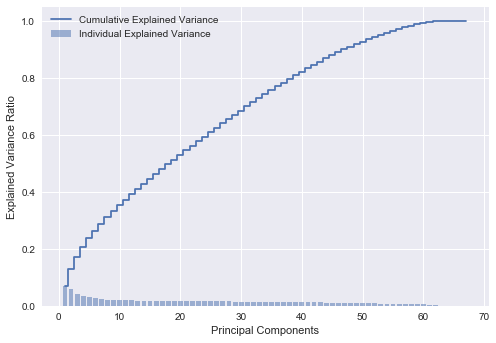

['accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'beds', 'minimum_nights', 'maximum_nights', 'AirConditioning', 'BuzzerWirelessIntercom', 'Essentials', 'FamilyKidFriendly', 'Petsliveonthisproperty', 'neighbourhood_Brighton', 'neighbourhood_East Boston', 'neighbourhood_Fenway', 'neighbourhood_Leather District', 'neighbourhood_Longwood Medical Area', 'neighbourhood_Mission Hill', 'neighbourhood_South Boston', 'neighbourhood_South Boston Waterfront', 'neighbourhood_West End', 'property_type_Apartment', 'neighbourhood_West Roxbury', 'property_type_Bed & Breakfast', 'property_type_Condominium', 'property_type_House', 'property_type_Loft', 'property_type_Villa', 'room_type_Shared room', 'room_type_Private room', 'bed_type_Airbed', 'room_type_Entire home/apt', 'neighbourhood_South End', 'neighbourhood_Roxbury', 'neighbourhood_Roslindale', 'neighbourhood_North End', 'neighbourhood_Mattapan', 'neighbourhood_Jamaica Plain', 'neighbourhood_Hyde Park', 'neighbourhood_Downtown', 'neighb

In [9]:
cov_X = np.cov(X_train.T) # Construct the covariance matrix.
eigen_vals, eigen_vecs = np.linalg.eig(cov_X) #Decompose the covariance matrix into its eigenvectors and eigenvalues.

import matplotlib.pyplot as plt
sorted_eigen_vals = sorted(eigen_vals, reverse = True)
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted_eigen_vals]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,len(var_exp)+1), var_exp, alpha = 0.5, align = 'center',
        label = 'Individual Explained Variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid',
        label = 'Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()
pca = []
for i in range(0,60) :
    #print(str(i+1) + ' principal component is:' + str(X.columns.values[np.where(eigen_vals==sorted_eigen_vals[i])]))
    pca.extend(X.columns.values[np.where(eigen_vals==sorted_eigen_vals[i])])
print(pca)
X = X[pca]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.33,
                            random_state=0)
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

In [11]:
print(np.max(y_train), np.min(y_train), np.mean(y_train))
print(np.max(y_test), np.min(y_test), np.mean(y_test))

8.85244875771 -1.26582710169 7.9786458164e-17
8.212352469 -1.18350385135 -0.0393790605441


In [12]:
def train_and_validate(method_name, slr, X_train,y_train, X_test, y_test):
    slr.fit(X_train,y_train)
    y_train_pred = slr.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    y_test_pred = slr.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print('Method: %s' %method_name)
    print('MSE on training: %.3f' %mse_train)
    print('r^2 on training: %.3f' %r2_train)
    print('MSE on test: %.3f' %mse_test)
    print('r^2 on test: %.3f' %r2_test)
    
    return y_test_pred

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Compute MSE on training data
sgdreg = SGDRegressor(loss='squared_loss', penalty=None,  random_state=10)

method_name = 'Stochastic Gradient Descent Regression'
y_test_pred = train_and_validate(method_name, sgdreg, X_train,y_train, X_test, y_test)

Method: Stochastic Gradient Descent Regression
MSE on training: 0.372
r^2 on training: 0.628
MSE on test: 0.393
r^2 on test: 0.607


In [14]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.05, l1_ratio=0.1)
y_test_pred = train_and_validate("Elastic Net", enet, X_train,y_train, X_test, y_test)

Method: Elastic Net
MSE on training: 0.369
r^2 on training: 0.631
MSE on test: 0.381
r^2 on test: 0.618


In [15]:
from sklearn import svm
slr_svr = svm.SVR(kernel='linear')
y_test_pred = train_and_validate("Support Vector Machine", slr_svr, X_train,y_train, X_test, y_test)

Method: Support Vector Machine
MSE on training: 0.407
r^2 on training: 0.593
MSE on test: 0.399
r^2 on test: 0.600


In [130]:
from sklearn.svm import SVR
slr_svr_rbf_1 = SVR(kernel='rbf', C=1)
y_test_pred_1 = train_and_validate("Support Vector Machine RBF", slr_svr_rbf_1, X_train,y_train, X_test, y_test)
slr_svr_rbf_2 = SVR(kernel='rbf', C=10)
y_test_pred_2 = train_and_validate("Support Vector Machine RBF", slr_svr_rbf_2, X_train,y_train, X_test, y_test)

Method: Support Vector Machine RBF
MSE on training: 0.253
r^2 on training: 0.747
MSE on test: 0.363
r^2 on test: 0.636
Method: Support Vector Machine RBF
MSE on training: 0.089
r^2 on training: 0.911
MSE on test: 0.390
r^2 on test: 0.609


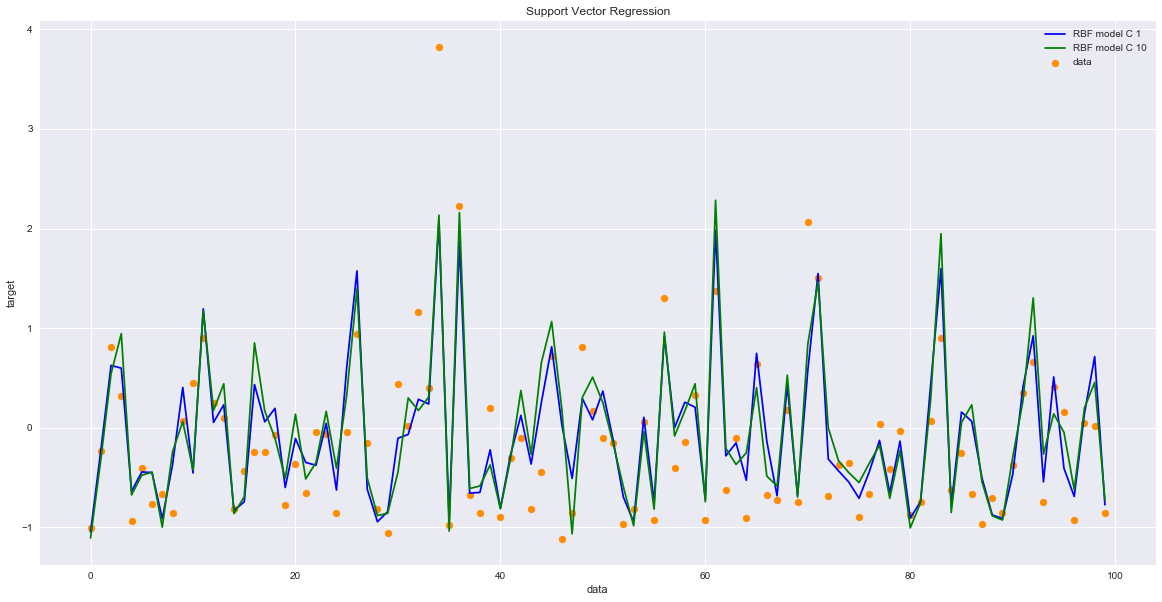

In [136]:
lw = 2
plt.scatter(range(0, 100), y_test[0:100], color='darkorange', label='data')
plt.hold('on')
plt.plot(range(0, 100), y_test_pred_1[0:100], color='b',label='RBF model C 1')
plt.plot(range(0, 100), y_test_pred_2[0:100], color='g',label='RBF model C 10')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

In [61]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(50,10,), max_iter=1000, learning_rate = 'adaptive')
y_test_pred = train_and_validate("Multi-layer Perceptron regressor", mlp, X_train,y_train, X_test, y_test)

Method: Multi-layer Perceptron regressor
MSE on training: 0.226
r^2 on training: 0.774
MSE on test: 0.345
r^2 on test: 0.654


In [62]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

model = Sequential()
model.add(Dense(25, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

rms = RMSprop()
model.compile(loss='mean_squared_error', optimizer='adam')

fit = model.fit(X_train, y_train,nb_epoch=35,batch_size=8,verbose=2, validation_data=(X_test, y_test))

Using Theano backend.


Train on 1603 samples, validate on 791 samples
Epoch 1/35
0s - loss: 0.6431 - val_loss: 0.3589
Epoch 2/35
0s - loss: 0.3820 - val_loss: 0.3320
Epoch 3/35
0s - loss: 0.3496 - val_loss: 0.3289
Epoch 4/35
0s - loss: 0.3422 - val_loss: 0.3456
Epoch 5/35
0s - loss: 0.3217 - val_loss: 0.3223
Epoch 6/35
0s - loss: 0.3014 - val_loss: 0.3383
Epoch 7/35
0s - loss: 0.3010 - val_loss: 0.3338
Epoch 8/35
0s - loss: 0.3097 - val_loss: 0.3384
Epoch 9/35
0s - loss: 0.2905 - val_loss: 0.3640
Epoch 10/35
0s - loss: 0.2689 - val_loss: 0.4152
Epoch 11/35
0s - loss: 0.2680 - val_loss: 0.4073
Epoch 12/35
0s - loss: 0.2662 - val_loss: 0.3563
Epoch 13/35
0s - loss: 0.2622 - val_loss: 0.3506
Epoch 14/35
0s - loss: 0.2533 - val_loss: 0.3532
Epoch 15/35
0s - loss: 0.2487 - val_loss: 0.3908
Epoch 16/35
0s - loss: 0.2343 - val_loss: 0.3361
Epoch 17/35
0s - loss: 0.2358 - val_loss: 0.3783
Epoch 18/35
0s - loss: 0.2367 - val_loss: 0.3767
Epoch 19/35
0s - loss: 0.2224 - val_loss: 0.3443
Epoch 20/35
0s - loss: 0.2240 -

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 180, 
          'max_depth': 1, 
          'min_samples_split': 2,
          'learning_rate': 0.2, 
          'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)

gbr.fit(X_train, y_train)
y_pred_gbr = train_and_validate("forward stage-wise", gbr, X_train,y_train, X_test, y_test)

Method: forward stage-wise
MSE on training: 0.364
r^2 on training: 0.636
MSE on test: 0.367
r^2 on test: 0.633


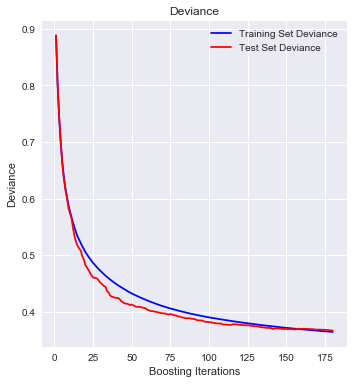

In [95]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

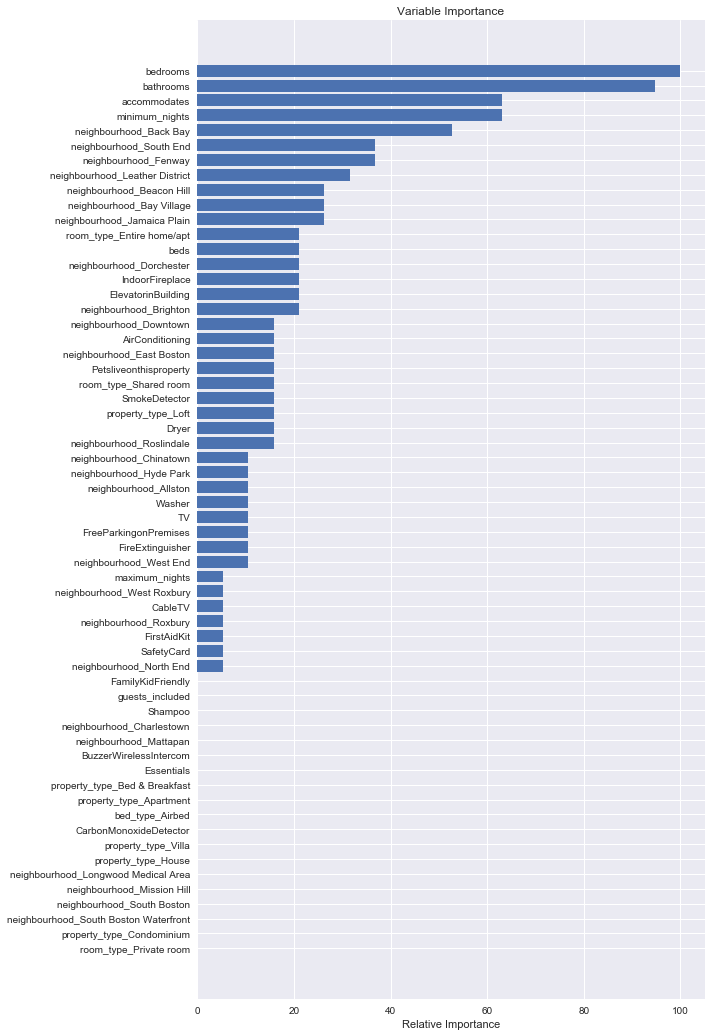

In [96]:
feature_importance = gbr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
fig = plt.gcf()
fig.set_size_inches(20, 18)
plt.show()

Automatically created module for IPython interactive environment


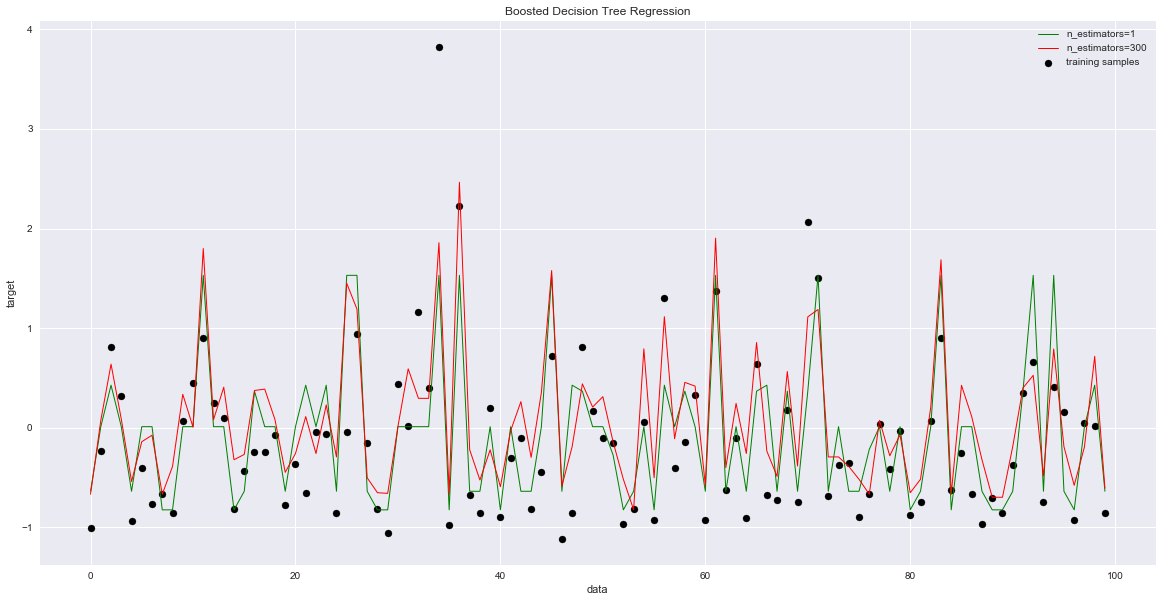

In [138]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators=2000, random_state=0)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(range(0,100), y_test[0:100], c="k", label="training samples")
plt.plot(range(0,100), y_1[0:100], c="g", label="n_estimators=1", linewidth=1)
plt.plot(range(0,100), y_2[0:100], c="r", label="n_estimators=2000", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

In [98]:
pred = train_and_validate("Decision Tree Regressor", regr_1, X_train,y_train, X_test, y_test)

Method: Decision Tree Regressor
MSE on training: 0.414
r^2 on training: 0.586
MSE on test: 0.530
r^2 on test: 0.470


In [99]:
pred = train_and_validate("AdaBoost DTR", regr_2, X_train,y_train, X_test, y_test)

Method: AdaBoost DTR
MSE on training: 0.116
r^2 on training: 0.884
MSE on test: 0.391
r^2 on test: 0.608


In [115]:
regr_2.predict(X_test)[0]

-0.66711255379449541

In [116]:
scalery.inverse_transform(-0.66711255379449541)

array(99.99999999999999)